In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
#Import the necessary libraries.

## Lab | Feature extraction

## Open the categoricals variable we created before.

In [6]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


In [7]:
categorical_df= data.select_dtypes([object])
categorical_df.head(15)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,1/18/11,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,2/17/11,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


## 2 Plot all the categorical variables with the proper plot. What can you see?

It's nice to see if some groups have very small representation, and worth removing or grouping.

In [8]:
col_cat=list(categorical_df.columns.values)
col_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

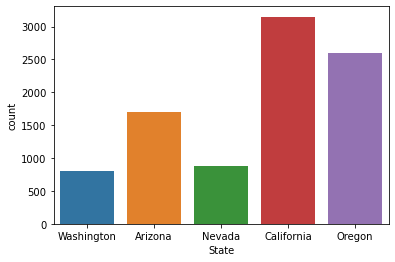

In [12]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=data.State);


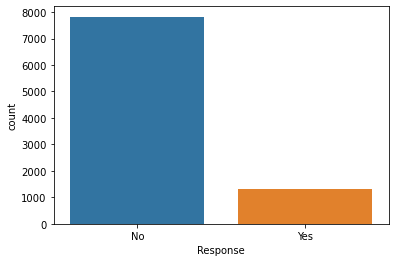

In [16]:
sns.countplot(x=data.Response);

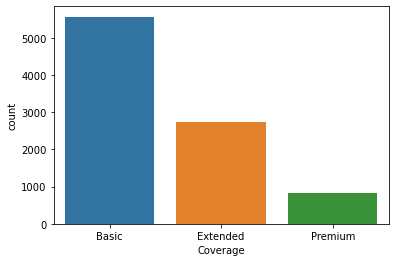

In [17]:
sns.countplot(x=data.Coverage);

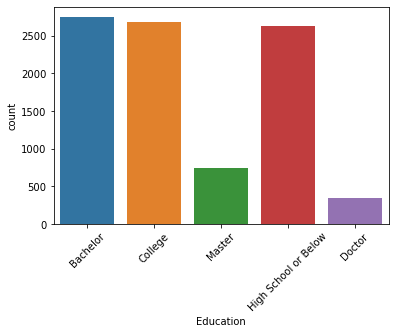

In [25]:
sns.countplot(x=data.Education);
plt.xticks(rotation=45);

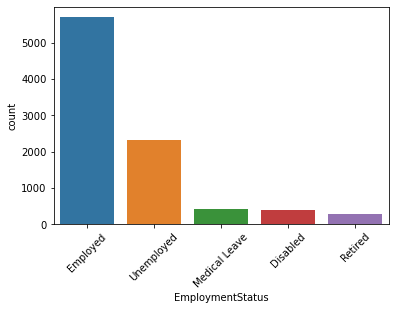

In [31]:
sns.countplot(x=data.EmploymentStatus);
plt.xticks(rotation=45);

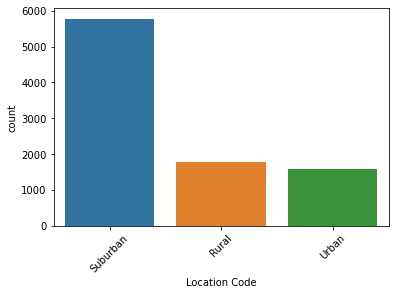

In [32]:
sns.countplot(x=data['Location Code']);
plt.xticks(rotation=45);

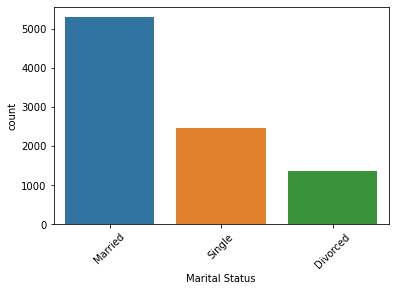

In [33]:
sns.countplot(x=data['Marital Status']);
plt.xticks(rotation=45);

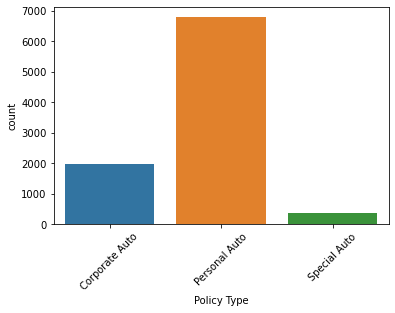

In [34]:
sns.countplot(x=data['Policy Type']);
plt.xticks(rotation=45);

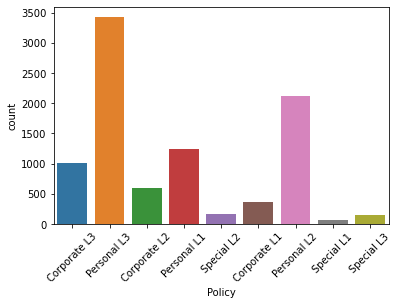

In [35]:
sns.countplot(x=data['Policy']);
plt.xticks(rotation=45);

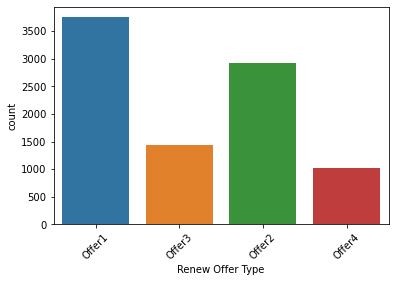

In [36]:
sns.countplot(x=data['Renew Offer Type']);
plt.xticks(rotation=45);

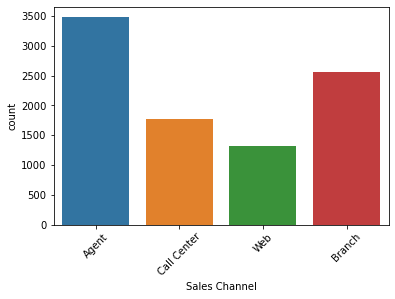

In [37]:
sns.countplot(x=data['Sales Channel']);
plt.xticks(rotation=45);

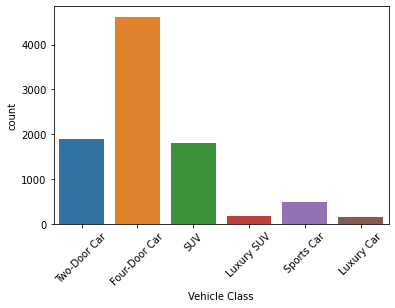

In [38]:
sns.countplot(x=data['Vehicle Class']);
plt.xticks(rotation=45);

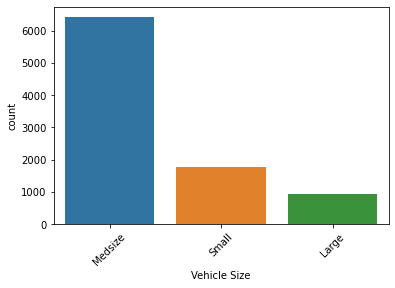

In [40]:
sns.countplot(x=data['Vehicle Size']);
plt.xticks(rotation=45);

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [ ]:
#Yes, I would do still the same things that I was doing in Lab Comparing Regression Model.
#So I put masters and doctors in bachelor group (as it's a group of people with high level of education)
#As well 'Vehicle Class' has too many smal groups, so we can put Luxury SUV, sports cars and luxury car into SUV group.
#Group Policy I would combine by L1,L2,L3 as I decided before not by personal,corporate and special as 'Policy Type' 
#will have this devision.And for EmploymentStatus I would combine small group in retired - so medical leave, retired and 
#disabled create one group (3 minory groups together). I am not presenting this code. But I will submit my lab soon. 
#Was actually nice to see this histograms...make data very representative.

## 4. Plot time variable. Can you extract something from it?

In [79]:
data['Effective To Date']=pd.to_datetime(data['Effective To Date'])
data['month'] = data['Effective To Date'].dt.month
data['Day of Week'] = data['Effective To Date'].apply(lambda time: time.dayofweek)
data['month'].value_counts()
# we have only data for January and February

1    4898
2    4236
Name: month, dtype: int64

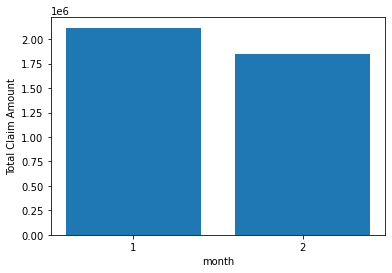

In [81]:
data2=data.groupby(['month'])
sum_claim_amount=data2.sum()['Total Claim Amount']
months=[month for month, data in data2]
plt.bar(months,sum_claim_amount)
plt.xticks(months)
plt.ylabel('Total Claim Amount')
plt.xlabel('month')
plt.show()
#more claim amount in January!

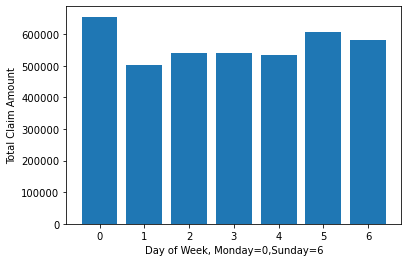

In [78]:
data1=data.groupby(['Day of Week'])
sum_claim_amount=data1.sum()['Total Claim Amount']
days=[day for day, data in data1]
plt.bar(days,sum_claim_amount)
plt.xticks(days)
plt.ylabel('Total Claim Amount')
plt.xlabel('Day of Week, Monday=0,Sunday=6')
plt.show()
#more claim amounts on Monday, Saturday and Sunday.